<a href="https://colab.research.google.com/github/AyushiMalviya08/HandWritten-digit-recognition/blob/main/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from scipy.ndimage import gaussian_filter
from scipy.ndimage import convolve
from skimage.util import random_noise

In [ ]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [ ]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [ ]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split=0.1)


Epoch 1/5
422/422 [==============================] - 59s 136ms/step - loss: 0.3595 - accuracy: 0.8908 - val_loss: 0.0785 - val_accuracy: 0.9788
Epoch 2/5
422/422 [==============================] - 42s 100ms/step - loss: 0.1086 - accuracy: 0.9668 - val_loss: 0.0580 - val_accuracy: 0.9833
Epoch 3/5
422/422 [==============================] - 44s 104ms/step - loss: 0.0822 - accuracy: 0.9746 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 4/5
422/422 [==============================] - 44s 104ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 5/5
422/422 [==============================] - 42s 99ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.0380 - val_accuracy: 0.9892


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)



313/313 [==============================] - 3s 9ms/step - loss: 0.0356 - accuracy: 0.9877


In [ ]:
test_acc

0.9876999855041504

In [ ]:
predictions = model.predict(test_images)
np.argmax(predictions[0])


313/313 [==============================] - 3s 10ms/step


7

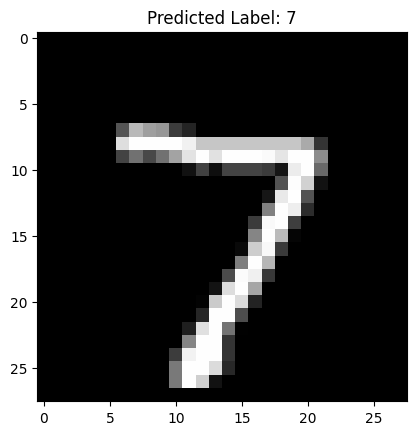

In [ ]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()


Gaussian smoothing

Text(0.5, 1.0, 'Smoothed Image')

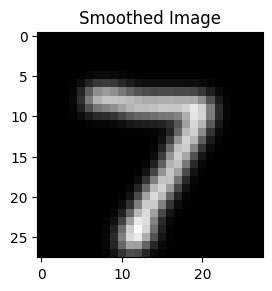

In [ ]:
smoothed_image = gaussian_filter(test_images[0].reshape(28, 28), sigma=1)
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title(f"Smoothed Image")

Laplacian sharpening

Text(0.5, 1.0, 'Sharpened Image')

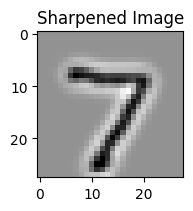

In [ ]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sharpened_image = convolve(smoothed_image, laplacian_kernel)
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title(f"Sharpened Image")

Gaussian Noise

Text(0.5, 1.0, 'Noisy Image')

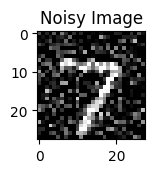

In [ ]:
noisy_image = random_noise(test_images[0].reshape(28, 28), mode='gaussian', var=0.1)
plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy Image")

Removing noise

Text(0.5, 1.0, 'Denoised Image')

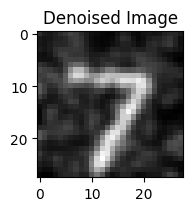

In [ ]:
denoised_image = gaussian_filter(noisy_image, sigma=1)
plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title(f"Denoised Image")

Text(0.5, 1.0, 'Sharpened Image')

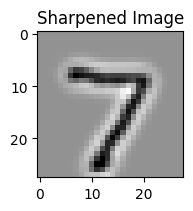

In [ ]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sharpened_image = convolve(smoothed_image, laplacian_kernel)
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title(f"Sharpened Image")